In [1]:
from fastai.vision.all import *

In [2]:
def get_data(url, presize, resize):
  path = untar_data(url)

  dblocks = DataBlock(
      blocks=(ImageBlock, CategoryBlock),
      get_items=get_image_files,
      splitter=GrandparentSplitter(valid_name='val'),
      get_y=parent_label,
      item_tfms=Resize(presize),
      batch_tfms=[*aug_transforms(min_scale=0.5, size=resize),
                  Normalize.from_stats(*imagenet_stats)]
  )

  return dblocks.dataloaders(path, bs=128)

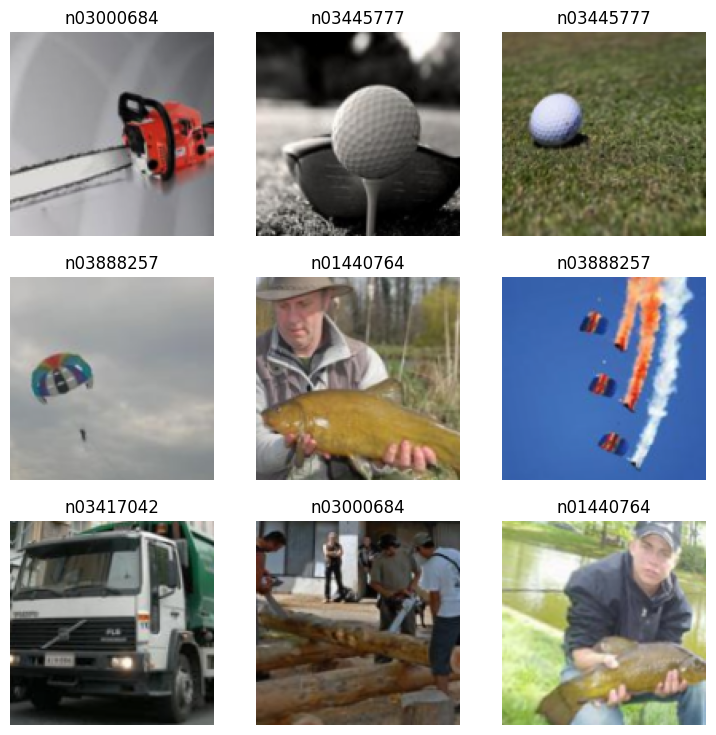

In [3]:
dls = get_data(URLs.IMAGENETTE_160, 160, 128)
dls.show_batch(max_n=9)

In [26]:
# target output size of 5x7
m = nn.AdaptiveAvgPool2d(1)
input = torch.randn(128, 256, 10, 10)

In [27]:
[i for i in m.parameters()]

[]

In [28]:
m(input).shape

torch.Size([128, 256, 1, 1])

In [15]:
dls.c

10

In [14]:
def block(ni, nf):
  return ConvLayer(ni, nf, stride=2)

In [31]:
def get_model():
  return nn.Sequential(
      block(3,16),
      block(16,32),
      block(32,64),
      block(64,128),
      block(128,256),
      nn.AdaptiveAvgPool2d(1),
      Flatten(),
      nn.Linear(256, dls.c))

In [32]:
def get_learner(m):
  return Learner(dls, m, loss_func=nn.CrossEntropyLoss(), metrics=accuracy).to_fp16()

In [35]:
leaner = get_learner(get_model())
leaner.model

Sequential(
  (0): ConvLayer(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (3): ConvLayer(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (4): ConvLayer(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256

In [37]:
leaner.summary()

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


Sequential (Input shape: 128 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 16 x 64 x 64  
Conv2d                                    432        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 32 x 32 x 32  
Conv2d                                    4608       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 16 x 16  
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
__________________________________

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


SuggestedLRs(valley=0.0005754399462603033)

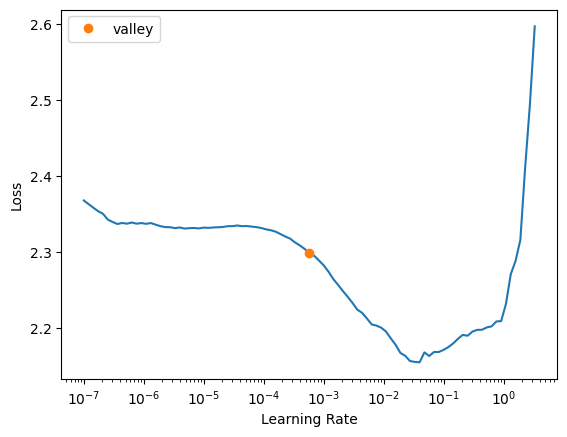

In [38]:
leaner.lr_find()

In [39]:
leaner.fit_one_cycle(5, lr_max=1e-3)

/usr/local/lib/python3.10/dist-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/cuda/amp/grad_scaler.py:126: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,1.986131,1.937529,0.306497,01:57
1,1.663231,1.859054,0.386497,02:03
2,1.436342,1.396100,0.554395,02:03
3,1.295289,1.261982,0.608917,02:02
4,1.218385,1.267017,0.600764,02:02


SuggestedLRs(valley=0.0003311311302240938)

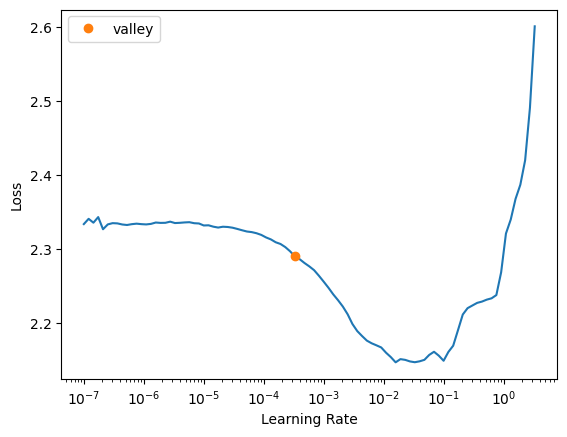

In [40]:
def get_model():
  return nn.Sequential(
      block(3,16),
      block(16,32),
      block(32,64),
      block(64,128),
      block(128,256),
      block(256,512),
      nn.AdaptiveAvgPool2d(1),
      Flatten(),
      nn.Linear(512, dls.c))

leaner = get_learner(get_model())
leaner.lr_find()

In [41]:
leaner.fit_one_cycle(5, lr_max=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.918048,1.764487,0.381401,02:21
1,1.569785,1.402631,0.542930,02:18
2,1.347316,1.220311,0.596943,02:22
3,1.176747,1.148020,0.622166,02:20
4,1.097034,1.079076,0.643822,02:21


In [42]:
leaner.summary()

Sequential (Input shape: 128 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 16 x 64 x 64  
Conv2d                                    432        True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 32 x 32 x 32  
Conv2d                                    4608       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 64 x 16 x 16  
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                                           
__________________________________